# Interactive Visualizations with Widgets

Before getting started, make sure to install the following libraries.  You can paste each line below in your terminal to do so.

```python
pip install folium
conda install -c conda-forge nodejs
jupyter labextension install @jupyter-widgets/jupyterlab-manager
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import ipywidgets as widgets
from ipywidgets import interact, interactive

### Using a Slider

In [2]:
def f(x):
    return x*2

In [3]:
interact(f, x = widgets.FloatSlider(min = -3, max = 3, step = 0.1));

interactive(children=(FloatSlider(value=0.0, description='x', max=3.0, min=-3.0), Output()), _dom_classes=('wi…

In [4]:
interact(f, x=['apples','oranges', 'florida']);

interactive(children=(Dropdown(description='x', options=('apples', 'oranges', 'florida'), value='apples'), Out…

### Alternative Approaches

In [5]:
#using a decorator
@interact(x = 10)
def f(x):
    return x**2

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [6]:
#interactive returns object to then be displayed
from IPython.display import display
def f(a, b):
    display(a + b)
    return a+b

In [7]:
w = interactive(f, a=10, b=20)

In [8]:
display(w)

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

In [9]:
#controlling layout with HBox
a = widgets.IntSlider()
b = widgets.IntSlider()
c = widgets.IntSlider()
ui = widgets.HBox([a, b, c])
def f(a, b, c):
    print((a, b, c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

Output()

In [10]:
def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.grid()
    plt.axhline(color = 'black')
    plt.axvline(color = 'black')
    plt.title(f'$f(x) = {m}x + {b}$')
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

### Working with Gapminder Data

In [12]:
df = pd.read_csv('data/gapminder_all.csv')

In [13]:
df.head()

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
0,Africa,Algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216
1,Africa,Angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476
2,Africa,Benin,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314
3,Africa,Botswana,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,...,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131
4,Africa,Burkina Faso,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,...,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203


In [14]:
df['continent'].unique()

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

In [15]:
continent_color = {'Africa': 'turquoise',
                  'Asia': 'red',
                  'Oceania': 'purple',
                  'Americas': 'green',  
                  'Europe':'yellow'}

In [16]:
df['colors'] = df['continent'].map(continent_color)

In [17]:
df['colors'].value_counts()

turquoise    52
red          33
yellow       30
green        25
purple        2
Name: colors, dtype: int64

In [18]:
df.head()

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,...,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007,colors
0,Africa,Algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,...,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216,turquoise
1,Africa,Angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,...,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476,turquoise
2,Africa,Benin,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,...,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314,turquoise
3,Africa,Botswana,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,...,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131,turquoise
4,Africa,Burkina Faso,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,...,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203,turquoise


**GOALS**

- Build an interactive visualization (scatterplot) of life expectancy vs. GDP where we can use a slider to move through the years 1952 - 2007.  

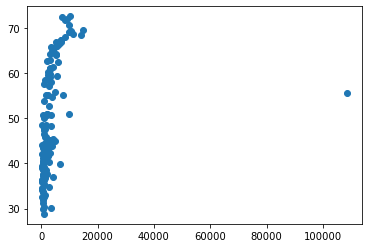

In [19]:
#scatter
plt.scatter(df['gdpPercap_1952'], df['lifeExp_1952'])

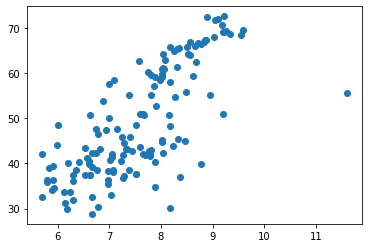

In [20]:
#log transform
plt.scatter(np.log(df['gdpPercap_1952']), df['lifeExp_1952'])

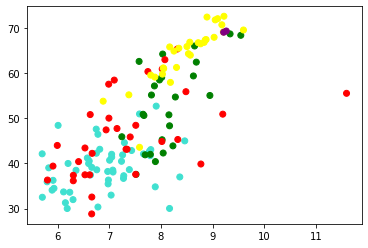

In [21]:
#add colors
plt.scatter(np.log(df['gdpPercap_1952']), df['lifeExp_1952'], c = df['colors'])

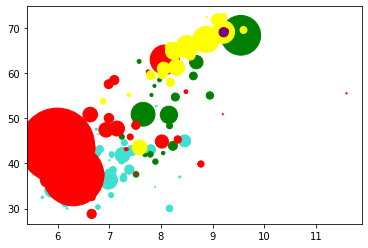

In [23]:
#size it
plt.scatter(np.log(df['gdpPercap_1952']), df['lifeExp_1952'], c = df['colors'],
           s = df['pop_1952']/10**5)

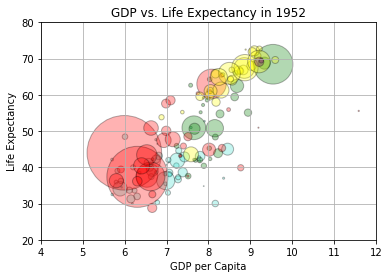

In [27]:
#edges and grid and title and labels
plt.scatter(np.log(df['gdpPercap_1952']), df['lifeExp_1952'], c = df['colors'],
           s = df['pop_1952']/10**5, alpha = 0.3, edgecolor = 'black')
plt.title('GDP vs. Life Expectancy in 1952')
plt.xlim(4, 12)
plt.ylim(20, 80)
plt.grid()
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy');

### A function for our plot

In [36]:
def gapminder_viz(year):
    plt.scatter(np.log(df[f'gdpPercap_{year}']), df[f'lifeExp_{year}'], c = df['colors'],
           s = df[f'pop_{year}']/10**5, alpha = 0.3, edgecolor = 'black')
    plt.title(f'GDP vs. Life Expectancy in {year}')
    plt.xlim(4, 12)
    plt.ylim(20, 100)
    plt.grid()
    plt.xlabel('GDP per Capita')
    plt.ylabel('Life Expectancy');

In [37]:
year = 1952

f'The year is {year}'

'The year is 1952'

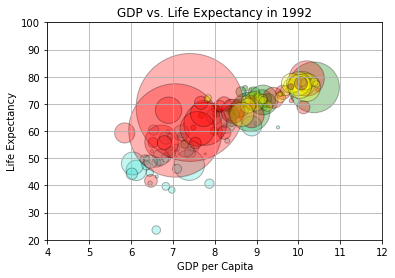

In [38]:
gapminder_viz(1992)

In [39]:
interact(gapminder_viz, year = widgets.IntSlider(min = 1952, max = 2007, step = 5))

interactive(children=(IntSlider(value=1952, description='year', max=2007, min=1952, step=5), Output()), _dom_c…

<function __main__.gapminder_viz(year)>

### Make a gif

In [40]:
#!pip install -U gif

In [41]:
import gif

In [42]:
@gif.frame
def gapminder_viz(year):
    plt.scatter(np.log(df[f'gdpPercap_{year}']), np.log(df[f'lifeExp_{year}']), c = df['colors'],
           s = df[f'pop_{year}']/10**5, alpha = 0.3, edgecolor = 'black')
    plt.grid();
    plt.xlim(5, 12)
    plt.ylim(3, 5)
    plt.title(f'Health vs. Wealth in {year}')

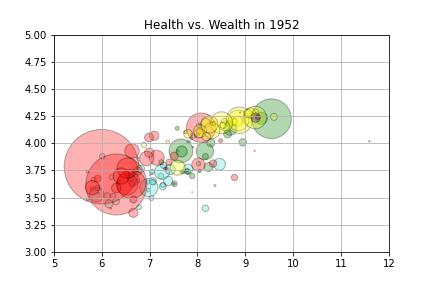

In [43]:
gapminder_viz(1952)

In [44]:
interact(gapminder_viz, year = widgets.IntSlider(min = 1952, max = 2007, step = 5))

interactive(children=(IntSlider(value=1952, description='year', max=2007, min=1952, step=5), Output()), _dom_c…

<function __main__.gapminder_viz(year)>

In [45]:
frames = []
for i in range(1952, 2012, 5):
    frame = gapminder_viz(i)
    frames.append(frame)

In [46]:
gif.save(frames, 'gapminder.gif', duration=100, unit="ms", between="frames")

In [47]:
!ls gapminder.gif

gapminder.gif


In [48]:
from IPython.display import Image

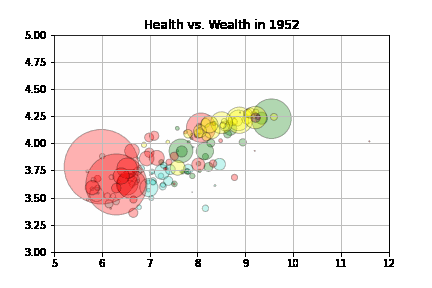

In [49]:
Image('gapminder.gif')

### Embed the `gif` with HTML

```
<img src = gapminder.gif />
```


<img src = gapminder.gif  width = 400 height = 600/>